In [1]:
import sys
sys.path.insert(1, 'src')

from src.coins import *
from src.generator import generate_random_model
from src.flips import perform_coin_flips
from src.reverse_engineer import Calix
from src.benchmarker import calculate_model_error

In [2]:
iterations = 100
num_flips = 1e4

models = []
complexity_data = []
error_data = []

for i in range(iterations):
    input_model = generate_random_model(max_size=50, min_size=50)
    result = perform_coin_flips(input_model, int(num_flips))
    output_model = Calix(result.flip_history, input_model.markov, input_model.size)
    error = calculate_model_error(input_model, output_model)
    
    models.append(input_model)
    complexity_data.append(input_model.complexity)
    error_data.append(error)

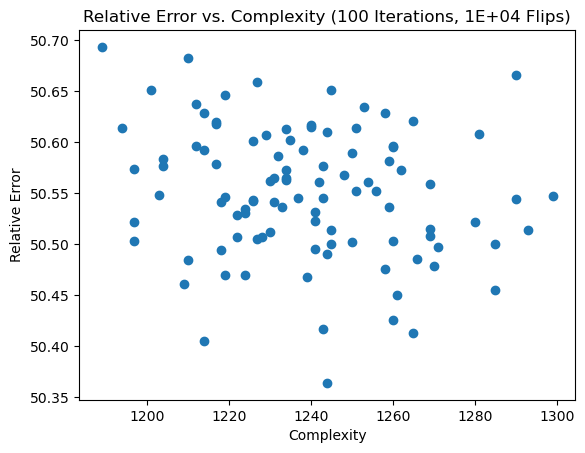

In [3]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure()
plt.scatter(complexity_data, error_data)
# plt.yticks([0, 0.5, 1])
plt.xlabel('Complexity')
plt.ylabel('Relative Error')
plt.title(f'Relative Error vs. Complexity ({iterations} Iterations, {num_flips:.0E} Flips)')
plt.show()